Loading Embedder...
 Generating queries for ONE document...
   Generating Red (Standard) queries...
   Generating Green (Heavy-Tail) queries...
Computing 2D Map...


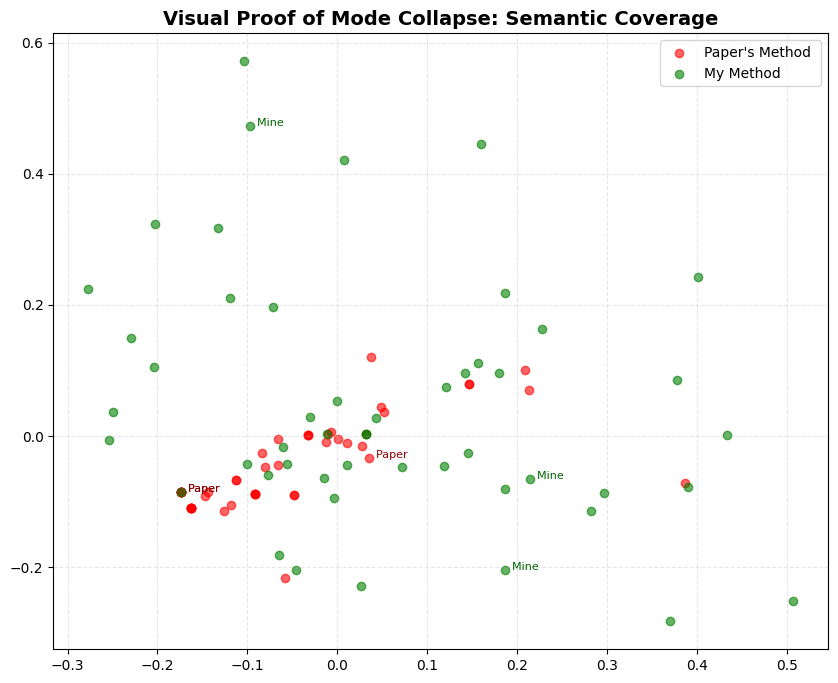


--- Paper's Queries ---
['"2026 US Treasury market liquidity crisis due to basis trade unwind and simultaneous withdrawal of liquidity by algorithmic market m', '"2026 US Treasury market liquidity crisis due to \'basis trade\' unwind and simultaneous withdrawal of liquidity by algorithm', '"2026 US Treasury market liquidity crisis caused by simultaneous withdrawal of algorithmic market makers during basis trade unwind and sudden']

--- Your Queries  ---
['"Unexpected withdrawal of liquidity by algorithmic market makers during high volatility periods and their impact on the 2026 US Tre', '"2026 liquidity crisis in US Treasury market unwind of basis trade and impact of algorithmic market makers withdrawal of liquidity', '"Impact of simultaneous withdrawal of algorithmic market makers during \'basis trade\' unwind, exacerbating 202']


In [1]:
import ollama
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA

MODEL_NAME = "cas/mistral-7b-instruct-v0.3:latest"

DOCUMENT = """
The 2026 liquidity crisis in the US Treasury market was triggered by a 'basis trade' unwind, 
where hedge funds were forced to sell futures contracts due to a sudden spike in repo rates. 
Unlike 2020, this event was exacerbated by the dominance of algorithmic market makers who 
withdrew liquidity simultaneously when volatility hit 3 standard deviations. The Federal Reserve's 
Standing Repo Facility (SRF) failed to dampen the shock because counterparty limits were too tight.
"""

PROMPT_TEMPLATE = f"""
Document: "{DOCUMENT}"
Task: Generate a specific search query that a user would type to find this exact information. 
The query must focus on a unique technical detail from the text.
Query:"""

print("Loading Embedder...")
embedder = SentenceTransformer('all-MiniLM-L6-v2')

print(f" Generating queries for ONE document...")

#RED: Paper's Settings 
red_queries = []
print("   Generating Red (Standard) queries...")
for _ in range(50):
    res = ollama.generate(
        model=MODEL_NAME, prompt=PROMPT_TEMPLATE, 
        options={'temperature': 0.7, 'top_p': 0.9, 'num_predict': 30}
    )
    red_queries.append(res['response'].strip())

#GREEN: My Settings
green_queries = []
print("   Generating Green (Heavy-Tail) queries...")
for _ in range(50):
    res = ollama.generate(
        model=MODEL_NAME, prompt=PROMPT_TEMPLATE, 
        options={'temperature': 1.5, 'top_p': 0.99, 'num_predict': 30}
    )
    green_queries.append(res['response'].strip())

print("Computing 2D Map...")
all_queries = red_queries + green_queries
embeddings = embedder.encode(all_queries)

# Use PCA to flatten the 384-dimension embeddings to 2D
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(embeddings)

red_dots = reduced_data[:50]
green_dots = reduced_data[50:]

# PLOT
plt.figure(figsize=(10, 8))
plt.scatter(red_dots[:, 0], red_dots[:, 1], color='red', alpha=0.6, label="Paper's Method ")
plt.scatter(green_dots[:, 0], green_dots[:, 1], color='green', alpha=0.6, label="My Method ")

plt.title("Visual Proof of Mode Collapse: Semantic Coverage", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)

# Annotate a few points to show what they are
for i in [0, 10, 20]:
    plt.text(red_dots[i,0], red_dots[i,1], "  Paper", fontsize=8, color='darkred')
    plt.text(green_dots[i,0], green_dots[i,1], "  Mine", fontsize=8, color='darkgreen')

plt.show()

# Print text samples to drive the point home
print("\n--- Paper's Queries ---")
print(red_queries[:3])
print("\n--- Your Queries  ---")
print(green_queries[:3])